In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
app = pd.read_pickle('/Users/krystal/Desktop/app_clean.p')
app.head()

,app,category,comment 1,comment 2,comment 3,current rating,current reviews,description,link,multiple devices,...,overall rating,overall reviews,price,rate 1,rate 2,rate 3,seller,user 1,user 2,user 3
0,"Kindle – Read eBooks, Magazines & Textbooks",Books,Please focus on reading and listening experien...,I can't believe they added a clock in the last...,You guys did an amazing job updating it and co...,2.65152,66,Turn your iPhone or iPad into a Kindle with th...,https://itunes.apple.com/us/app/kindle-read-eb...,Y,...,3.5,245670,Free,2,1,5,AMZN Mobile LLC,LambdaExpression,Lorring,Prellvis
1,"Audible – audio books, original series & podcasts",Books,It's very enjoyable to be able to listen to a ...,"Works great 99% of the time. When it didn't, t...","Audiobooks are a little bit expensive, but I l...",4.65113,1995,"Welcome to Audible. We’re an Amazon company, a...",https://itunes.apple.com/us/app/audible-audio-...,Y,...,4,100917,Free,3,5,5,"Audible, Inc.",Smuckitelly,Scorchedterra,vtalbot
2,Wattpad - Free Books and eBook Reader,Books,I am absolutely *in love* with Wattpad. Not on...,I love this app sooo much I won't be able to l...,I love wattpad! I really do! It's my favorite ...,4.59425,313,"Discover Wattpad:At Wattpad, we’re connecting ...",https://itunes.apple.com/us/app/wattpad-free-b...,Y,...,4.5,236764,Free,3,4,5,Wattpad Corp,dg2017xx,RedPandaWorld,Kajdisksn
3,"NOOK - Read Books, Magazines, Newspapers & Comics",Books,I would give it 5 stars if the App would put t...,Glad to have Nook on my iPad but wish maneuver...,I love reading books electronically. Having un...,4.33955,1072,"Get the FREE NOOK Reading App for your iPad, i...",https://itunes.apple.com/us/app/nook-read-book...,Y,...,4,55593,Free,4,3,3,Barnes&Noble,Morgan737364737,Too old to tap,Rstocky7
4,HOOKED - Chat Stories,Books,Keeps you on the edge of your seat. If you lov...,It's a great app and I love the chills (even i...,I just got through the first three parter and ...,4.54263,129,HOOKED lets you read amazing chat stories FREE...,https://itunes.apple.com/us/app/hooked-chat-st...,Y,...,4.5,28004,Free,4,2,4,Telepathic Inc.,100% Honest Feedback,Abbidon,Gangrel_Bloodfang


In [ ]:
app = app.drop_duplicates()


In [4]:
app['overall reviews'] = map(lambda x: int(x) if x!='' else np.nan, app['overall reviews'])
app['overall rating'] = map(lambda x: float(x) if x!='' else np.nan, app['overall rating'])
app['current rating'] = map(lambda x: float(x) if x!='' else np.nan, app['current rating'])

<b>Question 4 Do multiple languages influent the reviews of apps?</b>

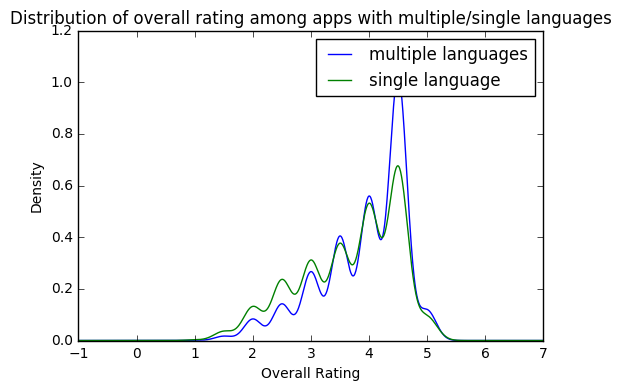

In [84]:
multi_language = app.loc[app['multiple languages'] == 'Y']
sin_language = app.loc[app['multiple languages'] == 'N']
multi_language['overall rating'].plot(kind = "density")
sin_language['overall rating'].plot(kind = "density")
plt.xlabel('Overall Rating')
plt.legend(labels = ['multiple languages','single language'], loc='upper right')
plt.title('Distribution of overall rating among apps with multiple/single languages')
plt.show()

<p>First, the data set is splitted into two parts, one is app with multiple languages and another is app with single language. Then the density plots for the two subsets are made and from the plots we can see that the overall rating of apps with multiple languages is generally higher than the overall rating of apps with single language. Some specific tests are still needed to perform.</p>

In [10]:
import scipy.stats

In [85]:
multi_language = list(multi_language['overall rating'])
sin_language = list(sin_language['overall rating'])

In [86]:
multiple = []
single = []
for each in multi_language:
    if each > 0:
        multiple.append(each)
for each in sin_language:
    if each > 0:
        single.append(each)

In [97]:
print(np.mean(multiple))
print(np.mean(single))

3.89935414424
3.67477656405


In [90]:
scipy.stats.ttest_ind(multiple, single, equal_var = False)

Ttest_indResult(statistic=10.700746078523993, pvalue=1.7812330368645647e-26)

<p>I perform t test here. We have two samples here, one is apps with multiple languages and another is apps with single language. So I want to test whether the mean overall rating for these two samples are different.</p>

<p>The null hypothesis is mean overall rating for apps with multiple languages and mean overall rating for apps with single language are the same and the alternative hypothesis is that the mean overall rating for these two samples are not the same.</p>

<p>From the result we can see that the p value is 1.7812330368645647e-26, which is smaller than 0.05, so we should reject null hypothesis at significance level 0.05, that is, we should conclude that the mean of overall rating for these two samples are not the same and multiple languages do influent the rating of an app.</p>

In [98]:
scipy.stats.f_oneway(multiple, single)

F_onewayResult(statistic=113.43305985218532, pvalue=3.0259308024434954e-26)

<p>I also perform one-way ANOVA test here.</p>

<p>The null hypothesis is mean overall rating for apps with multiple languages and mean overall rating for apps with single language are the same and the alternative hypothesis is that the mean overall rating for these two samples are not the same.</p>

<p>From the result we can see that the p value is 3.0259308024434954e-26, which is smaller than 0.05, so we should reject null hypothesis at significance level 0.05, that is, we should conclude that the mean of overall rating for these two samples are not the same and multiple languages do influent the rating of an app.</p>

In [99]:
scipy.stats.kruskal(multiple, single)

KruskalResult(statistic=107.25789207269921, pvalue=3.9085109588433391e-25)

<p>I perform Kruskal-Wallis H-test here, which is a non-parametric version of ANOVA. Since t test and one-way ANOVA test all need assumption that the samples shoule come from a normally distributed population, here we use this test, which do not need these assumptions but will lose some power.</p>

<p>The null hypothesis is mean overall rating for apps with multiple languages and mean overall rating for apps with single language are the same and the alternative hypothesis is that the mean overall rating for these two samples are not the same.</p>

<p>From the result we can see that the p value is 3.9085109588433391e-25, which is smaller than 0.05, so we should reject null hypothesis at significance level 0.05, that is, we should conclude that the mean of overall rating for these two samples are not the same and multiple languages do influent the rating of an app.</p>

<b>In general, from the results in these three tests, we can conclude that whether providing multiple languages can influent the rating of an app and the association needs further exploration.</b>